# HW 4

This assignment covers several aspects of Linear Regresstion. 
**DO NOT ERASE MARKDOWN CELLS AND INSTRUCTIONS IN YOUR HW submission**

  * **Q** - QUESTION
  * **A** - Where to input your answer

## Instructions

Keep the following in mind for all notebooks you develop:
* Structure your notebook. 
* Use headings with meaningful levels in Markdown cells, and explain the questions each piece of code is to answer or the reason it is there.
* Make sure your notebook can always be rerun from top to bottom.
* Please start working on this assignment as soon as possible. If you are a beginner in Python this might take a long time. One of the objectives of this assignment is to help you learn python and scikit-learn package. 
* Follow [README.md](README.md) for homework submission instructions


## Tutorials

* [scikit-learn linear model](https://scikit-learn.org/stable/modules/linear_model.html)
* [train-test-split](https://towardsdatascience.com/train-test-split-and-cross-validation-in-python-80b61beca4b6)
* [least squares fitting](https://python4mpia.github.io/fitting_data/least-squares-fitting.html)


# REGRESSION TASK USING SKLEARN

In jupyter notebook environment, commands starting with the symbol % are magic commands or magic functions. ```%%timeit``` is one of such function. It basically gives you the speed of execution  of certain statement or blocks of codes.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
# Lets see what we have in our directory
%ls

auto-mpg.data  auto-mpg.names  sample_data/


**Data ** Get the exploratory data and the folowwing files:      
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data
https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.names
* Link should automatically download the data
* copy them in your HW folder

* If you are using command line: 
```>> wget https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data```
  * If wget is not working 
    * dowload it from [link](https://eternallybored.org/misc/wget/) 
    * follow [steps](https://stackoverflow.com/questions/29113456/wget-not-recognized-as-internal-or-external-command)

In [ ]:
# Lets see our folder again
%ls

auto-mpg.data  auto-mpg.names  sample_data/


**Q1** Read the data using pandas, and replace the ??? in the code cell below to accomplish this taks. Note that auto-mpg.data does not have the column headers. use auto-mpg.names file to provide column names to the dataframe. 

**A1** 

In [ ]:
# Replace ??? with code in the code cell below
#column_names = ['auto-mpg.names']
column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']
df = pd.read_csv('auto-mpg.data', names=column_names, na_values = " ", comment='\t',sep=" ", skipinitialspace=True)

In [ ]:
# View head of the data to confirm the correctness of your answer
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,NaN
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,NaN
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,NaN
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,NaN
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,NaN


## Data cleaning and manipulation

Use

**Q2** Data cleaning and manipulation: 
1. use ```pandas.info()``` method to find columns with large number of NaN values
2. remove the column with NaN values
3. Check if there are still NaN values in the dataframe using ```isna()``` method

**A2** Replace ??? with code in the code cell below

In [ ]:
#1. use pandas.info() method to find columns with large number of NaN values
df.info()

#2. remove the column with NaN values - replace ??? with code
df = df.drop(columns=['car name'])
# Print head
df.head()

#3. Check if there are still NaN values in the dataframe using ```isna()``` method - replace ??? with code 
df.isna( )
# drop if any left or replace Nan values
df.drop(df.index[df['horsepower'] == '?'], inplace = True)
#Print head
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      0 non-null      float64
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


**Q3:** 
1. Convert following columns 'cylinders', 'year', 'origin'  to dummy variable using pandas get_dummies() function
2. Do data normalization on real value/continous columns
   * The formula for normalization is: (Col_value- Mean of the col)/ Standard Deviation of the col

**A3** Replace ??? with code in the code cell below

In [ ]:
# 1. Convert following columns 'cylinders', 'year', 'origin'  to dummy variable using pandas get_dummies() function
cols = ['cylinders', 'model year', 'origin']
df_dummies = pd.get_dummies(cols)

#show the head
df_dummies.head()

# 2. Do data normalization on real value/continous columns?
realcols = df[cols]

for cols in realcols:
  mean = df[cols].mean()
  std = df[cols].std()
  df[cols] = mean/std

## Regression Task

Given all the information we will try to predict mpg - miles per gallon. The First step toward predicting the mpg from the dataset is to find the correlation between the columns/features of the dataset.  

**Q4** 
1. Use heatmap chart from seaborn library to findout the correlation between the columns.
2. Which of the columns is mostly related to mpg column and why?

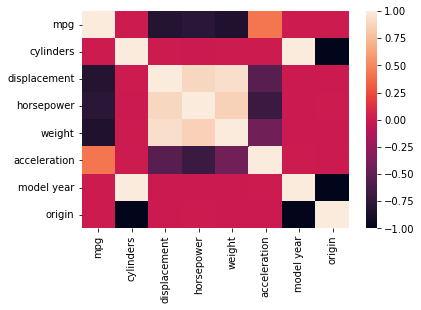

In [ ]:
# A4 code goes below
df = df.astype(float)
sns.heatmap(df.corr(), vmin=-1, vmax=1)

**A4**  
The weight and displacement columns apperar to have the most apparent correlations with the mpg column. This is due to the fact that heavy vehicles tend to affect the mpg of a vehicle more than most other factors. 

**Q5** 
1. Draw a lineplot or scattered plot between mpg and your answer from the above cell. 
2. Use pairplot from sns to plot our data frame df for better understanding of your selection 
   * NOTE: 2. should inform 3.
3. Choose a set of columns which are significantly related to our goal. 
   * Justify your answer using some explanation from the correlation chart above.
   * HINT: Refer to the newspaper radio TV example from the class slides

**A5**  For 1. and 2. replace ??? with code in the code cell below.  

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


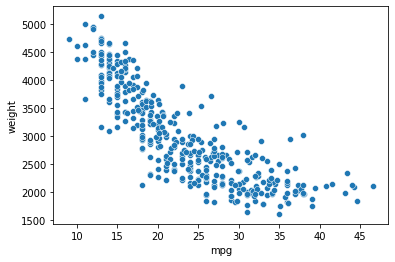

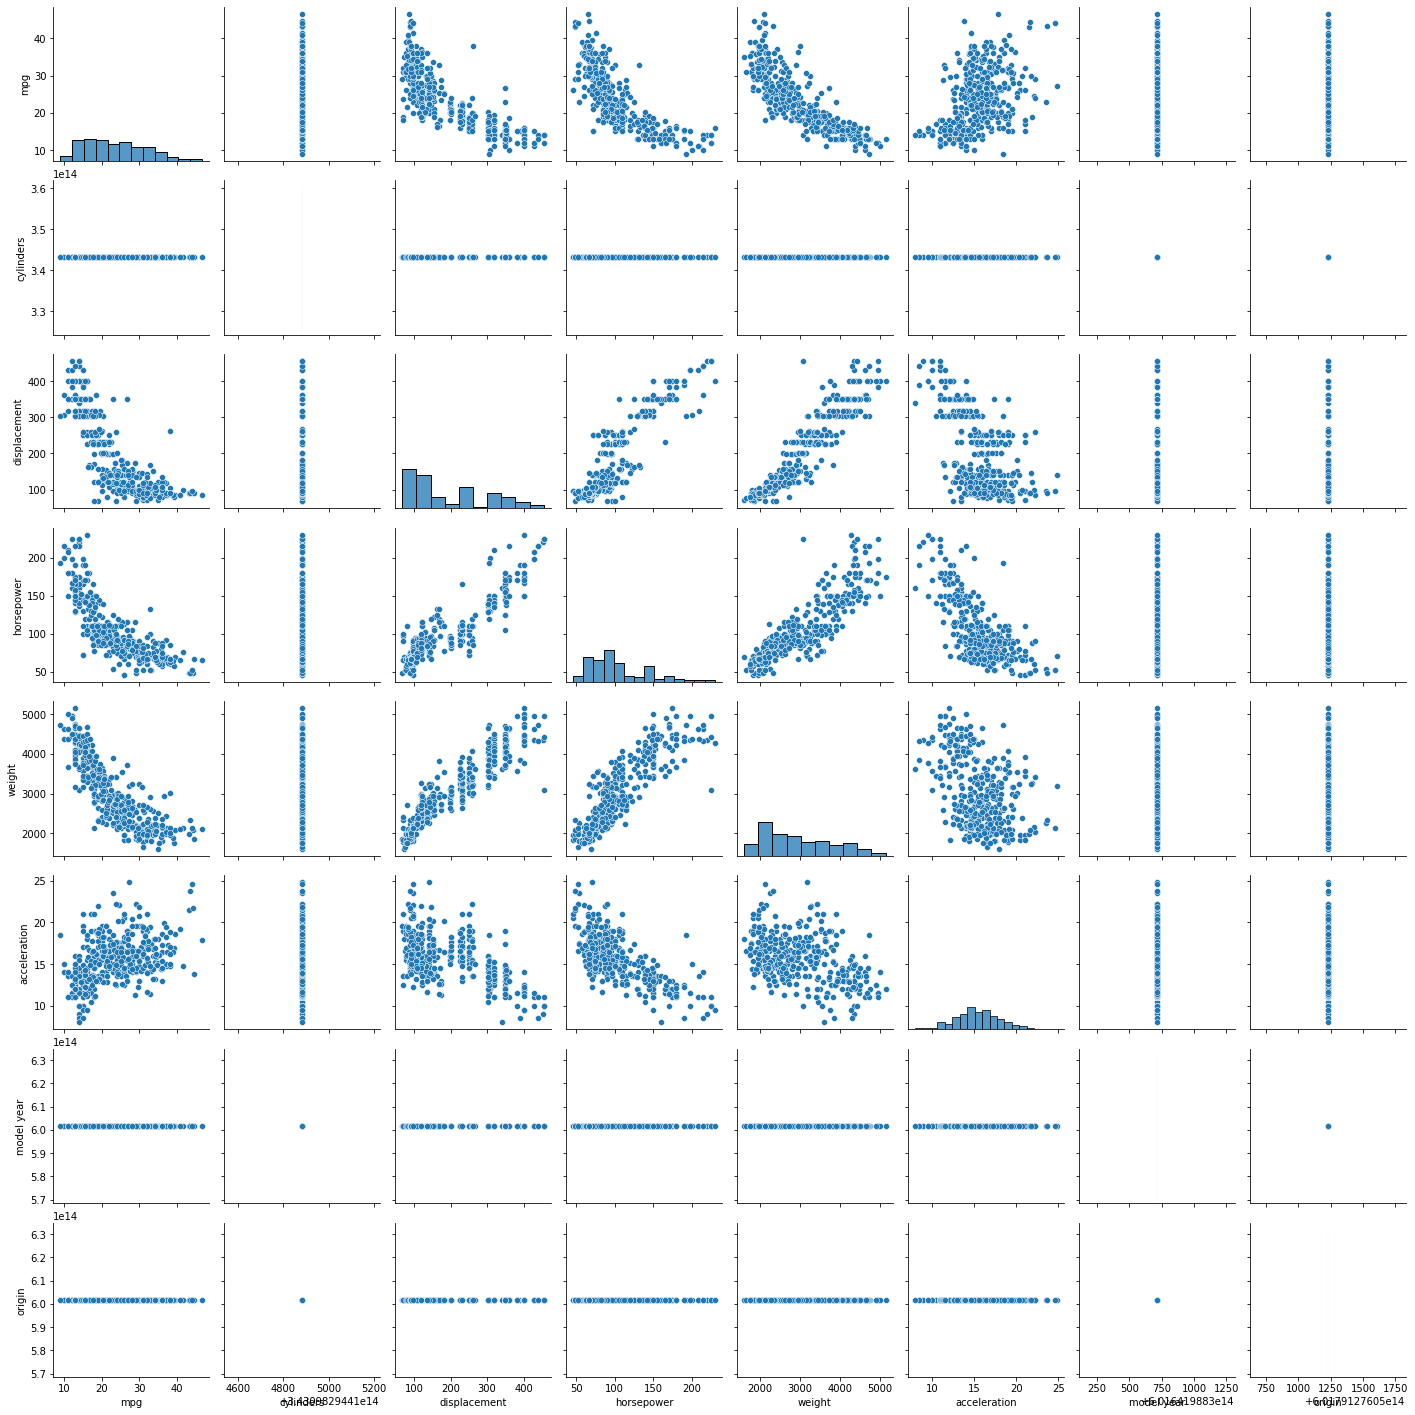

In [ ]:
# 1. Draw a lineplot or scattered plot between mpg and your answer from the above cell.
sns.scatterplot(df['mpg'], df['weight'])
# 2. Use pairplot from sns to plot our data frame df for better understanding of your selection 
sns.pairplot(data=df)

**A5**  For 3., write down your explanation here replacing this line

## Data Preparation

**Q6** Assign mpg column value to y and rest columns to x, remember x shouldn't have mpg

**A6** Replace ??? with code in the code cell below

In [ ]:
y = df.mpg
df.drop(columns=['mpg'])
x = df

**Q7** Use train_test_split to split the data set as train:test=(80%:20%) ratio.

**A7** Replace ??? with code in the code cell below

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split( x,y,test_size=.2)
# View the shape of your data set
xtrain.shape, xtest.shape, ytrain.shape, ytest.shape

((313, 8), (79, 8), (313,), (79,))

**Q8** Follow examples from references given in the top of this notebook  
* Note:Use linear model to fit regression line and plot  
* Our linear model will be of following type  
* Y = b + coef0*x0 + coef1*x1+coef2*x2+............  

**A8:** Replace ??? with code in the code cell below

In [ ]:
from sklearn import linear_model

reg = linear_model.LinearRegression()
reg.fit(x,y)

#Now view the coefficient use .coef_ and shape of .coef_
print(reg.coef_)
print(reg.intercept_)
print(reg.coef_.shape[0])

[ 1.00000000e+00 -2.45221444e-15 -1.38383306e-18 -4.25536751e-18
 -1.67239404e-18  9.43824757e-18  0.00000000e+00 -4.77540212e-16]
1.1287301258037807
8


**Q8** Relates to the code in the cell below. Why the printed values the same?

In [ ]:
# Now if you view 
print(f'{reg.coef_.shape[0]},{xtrain.shape[1]}, ', f'are equal? {reg.coef_.shape[0]==xtrain.shape[1]}')

8,8,  are equal? True


**A8** 
Because the training set and the regression coeffiecient are the same 

## Model Scoring

In [ ]:
# Model Score 
from sklearn import linear_model
reg = linear_model.LinearRegression()
reg.fit(xtrain, ytrain)
reg.score(xtest,ytest)

# Calculate the score on train and test sets
# Your code goes below
reg.score(xtrain,ytrain), reg.score(xtest,ytest)

(1.0, 1.0)

**Q9**  Each of the sklearn models have different model evaluations core value.  
* LinearRegression [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)
* More on [model_evaluation](https://scikit-learn.org/stable/modules/model_evaluation.html)

Explain what's the meaning of reg.score return value in this notebook. 

**A9**
Reg.score in this notenook tell us how good of a fit we got for a training set.

In [ ]:
# A custom function to calculate r2 score
# Details on the custom scorers: https://scikit-learn.org/stable/modules/model_evaluation.html

def r2score(ytrue, ypred):
  rss = ((ytrue - ypred)**2).sum()
  tss = ((ytrue - ytrue.mean()) ** 2).sum()
  r2 = 1 - rss/tss
  return r2

# Now do prediction on xtrain and xtest and check your r2 score by printing rescore values 
trainpredict = reg.predict(xtrain)
testpredict = reg.predict(xtest)

print(r2score(ytrain, trainpredict), r2score(ytest, testpredict))

# You can see that reg.score values and your custom function output are matched

1.0 1.0


One way of achieving linear regression is by minimizing the error between actual y and predicted y. The method is known as least square method.  We will make our custom least square optimize to calculate model parameters that minimizes output error.   

**Q10** Write a function which takes weights(or params), x and y and do following
* 1. calculate dot product between x and params , which is ypredicted
* 2. calculate difference between actual y and ypredicted
* 3. return the difference

**A10** complete the code below

In [ ]:
import scipy.optimize as optimization

def constraint(params, x, y):
  ypred = x@params
  return y-ypred

# Our initial params is a vector of size equal to dimension of x, or you can say number of columns of x
# You can create zeros vector using np.zeros(size)

# complete code
params = np.zeros(25)

# Now study the documentation and complete following code
#x0 = np.array([0.0, 0.0])
params, _ = optimization.leastsq(constraint, x0, args=(x, y))

# Now we have parameter or weight we can now create our model
model = lambda x:np.dot(x,params)

# Now predict ytrain using model and see first 5 predicted and actual values
ypred_train = model(params)
# see first 5 predicted values
print(model)
# see first 5 actual values
print(ypred_train)
# Now predict ytest using model and see first 5 predicted and actual values
ypred_test = model(params)
print(model)
print(ypred_test)

# Now use custom made r2score calculator to calculate r2 score on both train and test set
print(r2score(ytest, ypred_test), r2score(ytrain, ypred_train))

# Add code to compare these results with the results you got from sklearn based implementation
#?????

ValueError: ignored